# Майнор Интеллектуальный анализ данных / Введение в анализ данных
## Домашнее задание №5
### Визуализация при обучении моделей машинного обучения

**Общая информация**

В этом задании вы рассмотрите пройденные в курсе методы с точки зрения визуализации их "внутренностей". Девиз задания - все интерпретируемо! Все инструменты были рассмотрены на семинарах, примеры для редких исключений приведены тут же в ноутбуке или по ссылкам.

Сопровождайте ваш код изображеними, комментариями и выводами.

Имейте ввиду, что на некоторые задачи нет единственного верного и полного ответа. Чем больше информации вы сможете извлечь, аргументированных выводов сформулировать, тем лучше.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

# Для кириллицы на графиках
font = {'family': 'Verdana',
        'weight': 'normal'}
plt.rc('font', **font)

Задание основано на Kaggle соревновании [Leaf Classification](https://www.kaggle.com/c/leaf-classification/).

Дана информация о 990 листьях, каждый из которых был сорван с одного из 99 видов растений.</br> 
Необходимо построить модель, которая могла бы определить, к какому растению относится каждый лист.

Большую часть задания вы будете работать с черно-белыми изображениями листьев, а в конце поработаете также с готовыми признаковыми описаниями листьев.

## 0. Загрузка данных

Скачайте данные по ссылкам: [таблица](https://drive.google.com/file/d/1LBc2YeddvEvDaCQHktJPZgJ3tZhJSGHh/view?usp=sharing) и [архив](https://drive.google.com/file/d/1cY5v5T26-_nqLkrJ6yUIVPIhCp7tulSi/view?usp=sharing) с изображениями.

Загрузим таблицу - файл `table_data.csv`.

В нем вы можете найти
* id - идентификатор листика
* species - столбец с названием растения (класс)
* margin, shape, texture - некоторые признаки листьев

In [2]:
DATA_DIR = os.path.join('data')
IMG_DIR = os.path.join(DATA_DIR, 'images')

In [3]:
filepath = os.path.join(DATA_DIR, 'table_data.csv')
table_data = pd.read_csv(filepath)

In [4]:
print("Число классов: %d"%table_data.species.nunique())

Число классов: 99


In [5]:
table_data.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


## Создание контрольного и обучающих множеств (1 балл)

* Задайте `random_seed`, который необходимо будет использовать при **всех** случаях использования генератора случайных чисел
* С помощью LabelEncoder закодируйте столбец `species` из исходных данных - вы должны получить одномерный numpy массив с метками классов от 0 до 98
* В переменную `X` запишите значения признаков margin, shape, texture - вы должны получить numpy-матрицу
* Случайным образом разбейте данные на обучающую и контрольную выборку, причем так, чтобы в контрольной выборке содержалось по 2 объекта каждого класса.
* Сохраните индексы объектов обучающего и контрольного множеств в переменные train_idx и test_idx

#### Hint
[Это](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html#sklearn.model_selection.StratifiedShuffleSplit) может помочь, чтобы сгенерировать выборку с нужными пропорциями классов.

In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit

In [7]:
np.random.seed(2021)

In [8]:
le = LabelEncoder()
y = le.fit_transform(table_data.species)

In [9]:
np.unique(y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98])

In [10]:
X = table_data.to_numpy()[:, 2:]

In [11]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=1)
sss.split(X, y)

<generator object BaseShuffleSplit.split at 0x0000029E93C2BCF0>

In [12]:
train_idx = []
test_idx = []
for train_index, test_index in sss.split(X, y):
    train_idx.append(train_index)
    test_idx.append(test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
train_idx = np.array(train_idx)
test_idx = np.array(test_idx)

In [13]:
pd.DataFrame(y_test).value_counts()

98    2
24    2
26    2
27    2
28    2
     ..
68    2
69    2
70    2
71    2
0     2
Length: 99, dtype: int64

In [14]:
train_idx.shape

(1, 792)

In [15]:
test_idx.shape

(1, 198)

Теперь загрузим картинки. В папке `images` лежат 1584 изображения в градациях серого различного размера.

In [16]:
# попробуем загрузить 1 изображение
filepath = os.path.join(IMG_DIR, '101.jpg')
img = plt.imread(filepath)

(673, 401)


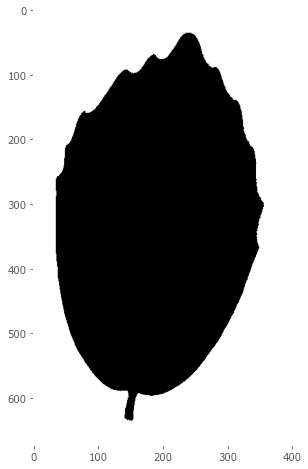

In [17]:
print(img.shape)
plt.imshow(img, cmap='Greys')
plt.grid(None)

Все изображения имеют разный размер, будем приводить их к размеру 100x100 с помощью функции skimage.transform.resize:

In [18]:
from skimage.transform import resize

In [19]:
img_resized = resize(img, (100, 100))

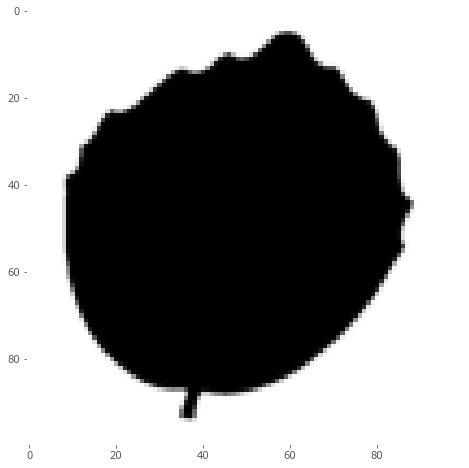

In [20]:
plt.imshow(img_resized, cmap='Greys')
plt.grid(None)

## Загрузка изображений (1 балл)
Загрузите все изображения листьев, отмасштабируйте, вытяните в вектор длины 10000 (np.ravel) и запишите их в массив размера (число изображений) x 10000. Сделайте два массива - с обучающими и контрольными картинками (останутся только не картинки, которые встречались в табличных данных), назовите их imgs_train и imgs_test. Столбец id в таблице соответствует номерам картинок в названиях файлов.  В итоге мы превратим картинки в попиксельные признаковые описания объектов-листьев.

In [21]:
num_img = 1584

In [22]:
images = np.zeros([num_img, 10000])

In [23]:
for i in range(num_img-1):
    name = str(i+1)+'.jpg'
    img = plt.imread(os.path.join(IMG_DIR, name))
    img_resized = resize(img, (100, 100))
    images[i] = np.ravel(img_resized)  # Создаю общий массив из картинок

In [24]:
images.shape

(1584, 10000)

In [25]:
train_img_idx = np.array(table_data.id)[train_idx]-1 # Нахожу номера нужных картинок из таблицы
test_img_idx = np.array(table_data.id)[test_idx]-1

In [26]:
imgs_train = images[train_img_idx][0] 
imgs_test = images[test_img_idx][0]

In [27]:
print(imgs_train.shape, imgs_test.shape)

(792, 10000) (198, 10000)


## 1. Visualization
Начнем с простой визуализации наших данных. Вам понадобится рисовать несколько картинок на одной - в виде таблицы. Это делается с помощью plt.subplot. Например, нарисуем 25 степенных функций:

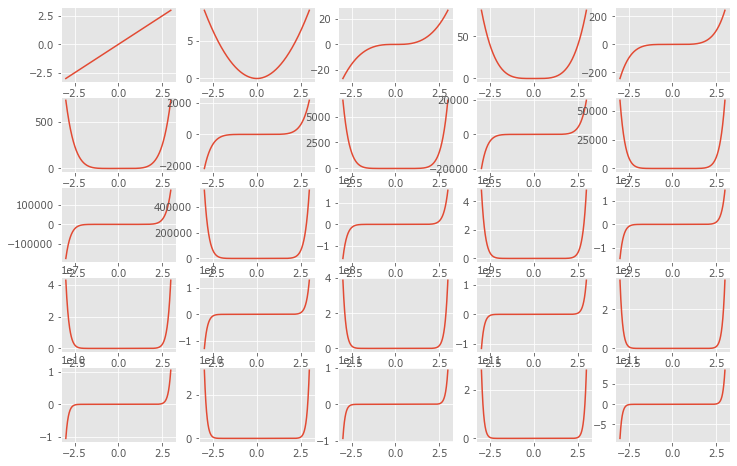

In [28]:
xs = np.linspace(-3, 3, 1000)
for i in range(1, 26): # числа от 1 до 25
    plt.subplot(5, 5, i) # первое число - сколько картинок по вертикали, второе - сколько по горизонтали, 
                         # третье - номер текущей картинки, если ситать слева направо, сверху вниз
    plt.plot(xs, xs**i)
    #plt.axis("off") # отключить оси, получится просто 25 линий

Кроме того, вам понадобится рисовать гистограммы. Это делается с помощью plt.hist:

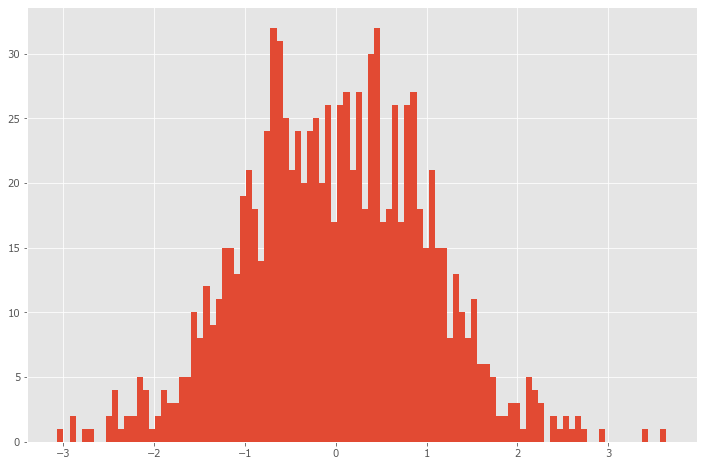

In [29]:
sample = np.random.normal(size=1000) # гистограмма строится по одномерной выборке - вектору чисел
_ = plt.hist(sample, bins=100) # то, что возвращает функция, сохранять никуда не нужно. bins=100 - число столбиков.

По гистограмме видно, какие значения наиболее популярны, какие - менее.

### Простая визуализация (1 балл код +1 балл выводы)
* Нарисуйте в табличке 10x10 99 изображений листьев - по одному каждого класса (одна ячейка таблицы останется пустой)
* Нарисуйте в табличке 10x10 100 гистограмм значений случайно выбранных пикселей (берем значние пикселя на всех картинках и составляем из них вектор, используйте векторизацию)
* Нарисуйте 1 картинку - "средний лист". Просто усредните все пиксели по изображениям. Затем нарисуйте еще 1 картинку - разброс каждого пикселя (насколько он отклоняется от среднего). Для этого воспользуйтесь функцией np.std

Все пункты выполняйте с использованием обучающей выборки (у нас данные однородны).

**99 изображений листьев разных классов**

In [30]:
from matplotlib.pyplot import figure

In [31]:
num_classes = np.unique(y_train).shape[0]
viz_idx = np.zeros(num_classes)
for i in range(num_classes):
    viz_idx[i] = np.where(y_train == i)[0][0] # Индексы картинок в обучающей выборке, 
                                              # соот. первым вхождениям класса в выборку

In [32]:
viz_idx = viz_idx.astype(int) 
y_train[viz_idx]                
# Полученные индексы репрезентируют все классы:

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98])

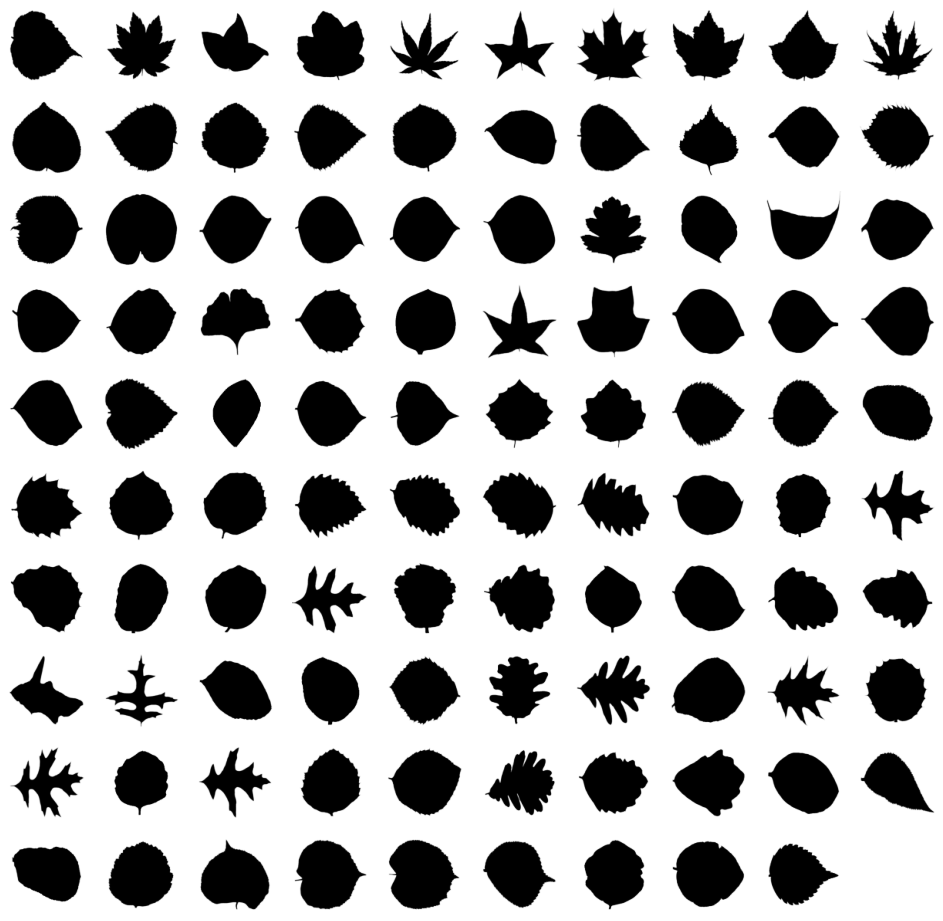

In [33]:
figure(figsize=(15, 15), dpi=80)
xs = np.linspace(-3, 3, 50)
for i in range(1, num_classes+1):
    plt.subplot(10, 10, i)
    plt.imshow(imgs_train[viz_idx[i-1]].reshape(100, 100), cmap='Greys')
    plt.grid(None)
    plt.axis("off") 

**100 распределений пикселей**

In [34]:
num_pixels = 100
pix_idx = np.zeros(num_pixels)

for i in range (num_pixels):
    pix_idx[i] = np.random.randint(low = 0, high = imgs_train.shape[1])
pix_idx = pix_idx.astype(int)

In [35]:
viz_pixels = imgs_train[:, pix_idx]

In [36]:
viz_pixels[:, 0].shape

(792,)

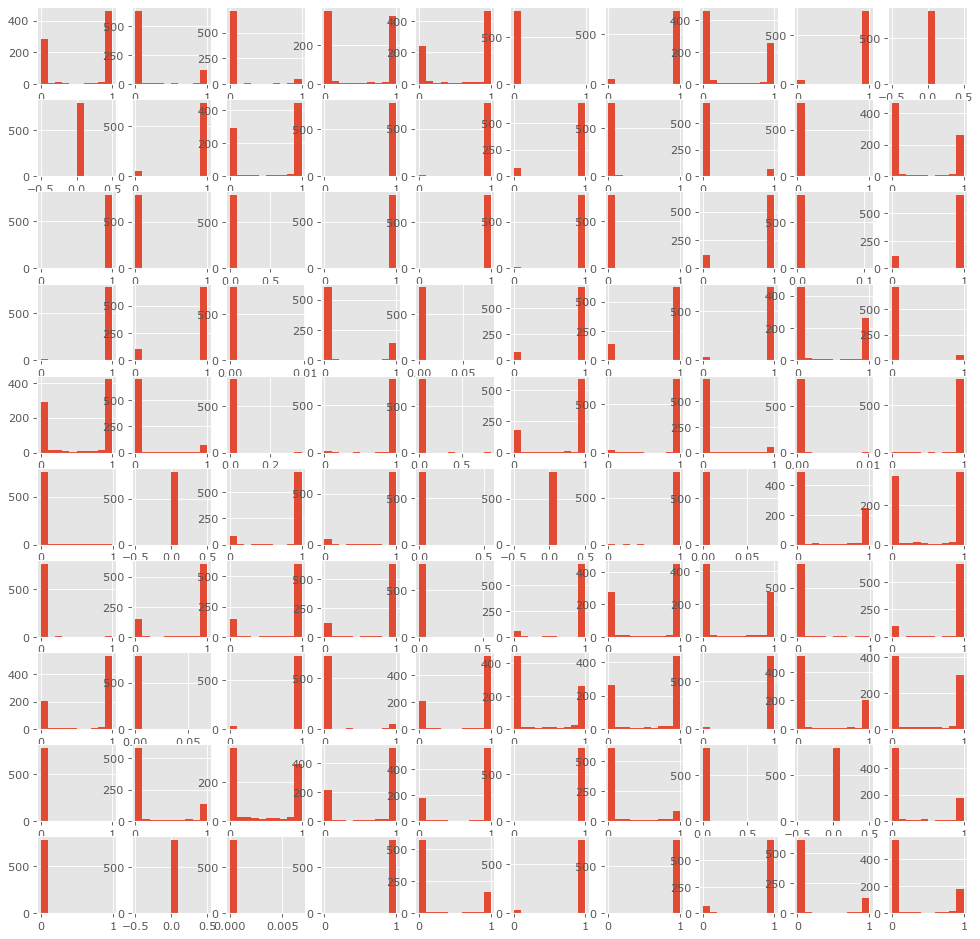

In [37]:
figure(figsize=(15, 15), dpi=80)
xs = np.linspace(-3, 3, 1000)
for i in range(1, num_pixels+1):
    plt.subplot(10, 10, i)
    plt.hist(viz_pixels[:, i-1])

**Средний лист**

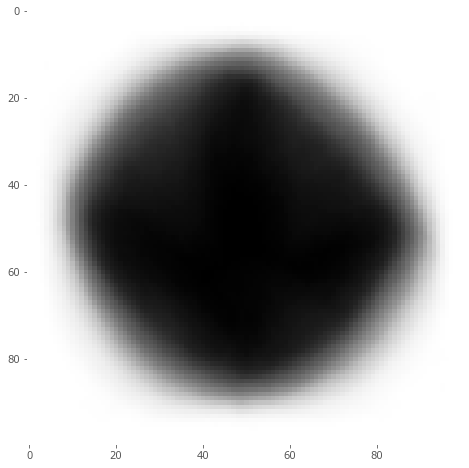

In [38]:
mean_leaf = np.mean(imgs_train, axis=0)
plt.imshow(mean_leaf.reshape(100, 100), cmap='Greys')
plt.grid(None)

**Отклонение пикселей от среднего**

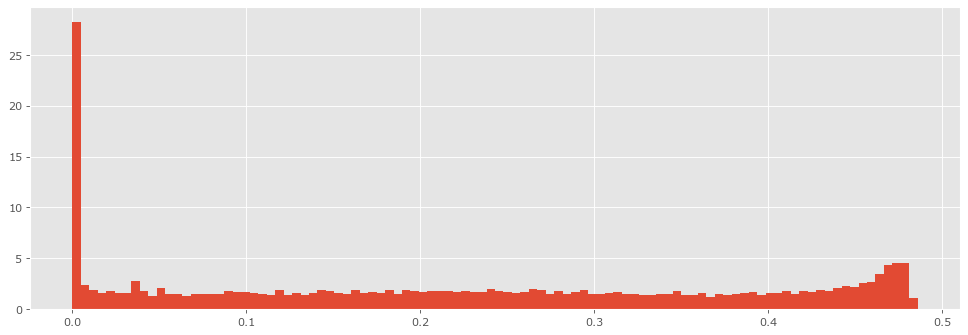

In [39]:
figure(figsize=(15, 5), dpi=80)
deviations = np.std(imgs_train, axis=0)
_ = plt.hist(deviations, bins=100, density=True)

Ответьте на вопросы:
* Можно ли отличить листья разных классов визуально? Можете ли вы выделить группы похожих классов?
* Каковы минимальное/максимальное значения признаков? Какого множество значений признаков? Какие значения чаще всего принимают признаки? Похожи ли распределения разных признаков между собой?
* Можно ли бинаризовать изображения (чтобы каждый пиксель принимал значение 0 или 1) без сильной потери информации? Почему вы так думаете? По какому порогу лучше бинаризовать?
* Похож ли "средний лист" на обычный лист? Как вы думаете, почему? Много ли пикселей, которые всегда принимают одно и то же значение (константный признак)? 

## ОТВЕТЫ

Для ответа на первый вопрос выведу еще раз изображение, визуализирующее разные классы: 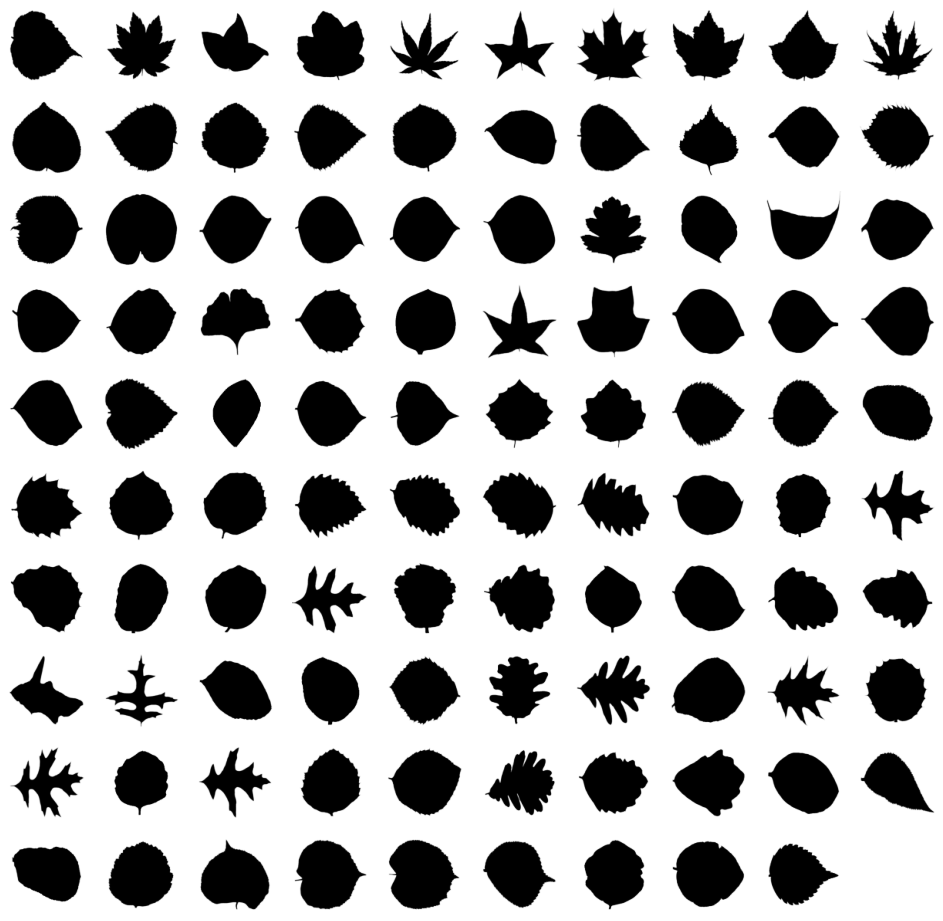

**Можно ли различить листья разных классов визуально - и да, и нет.** Довольно просто идентифицируются листья сложной формы, которые не потеряли узнаваемость при сжатии картинки и выводе ее в маленьком масштабе. При этом даже некоторые листья сложной формы могут быть похожими друг на друга на первый взгляд: например, 1 и 3 листы второго ряда снизу (чтобы условить различия, нужно вглядеться). Листья более округлой и правильной (после сжатия) формы распознаются уже сложнее - среди них очень много похожих, которые на визуализации различаются небольшими вариациями формы или, например, положением черешка.

**Можно ли выделить группы похожих классов - да.**  Именно в силу схожести многих классов и сложностей в их различении можно выделить группы листьев, которые схожи по форме. В целом, я думаю, сложесть многих листьев (особенно тех, что в визуализации получили правильную форму) детерминирована скорее сжатием и изменением изображений, чем какими-то принципиальными сходствами в оригинальном виде. Тем не менее, имеющиеся изображения можно сгруппировать.

В качестве примера объекдинения классов в группы я выделила разными цветами три условных кластера - листья самой сложной формы (оранжевый), листья звездообразной формы (желтый), листья в форме капли, повернутой влево (синий):

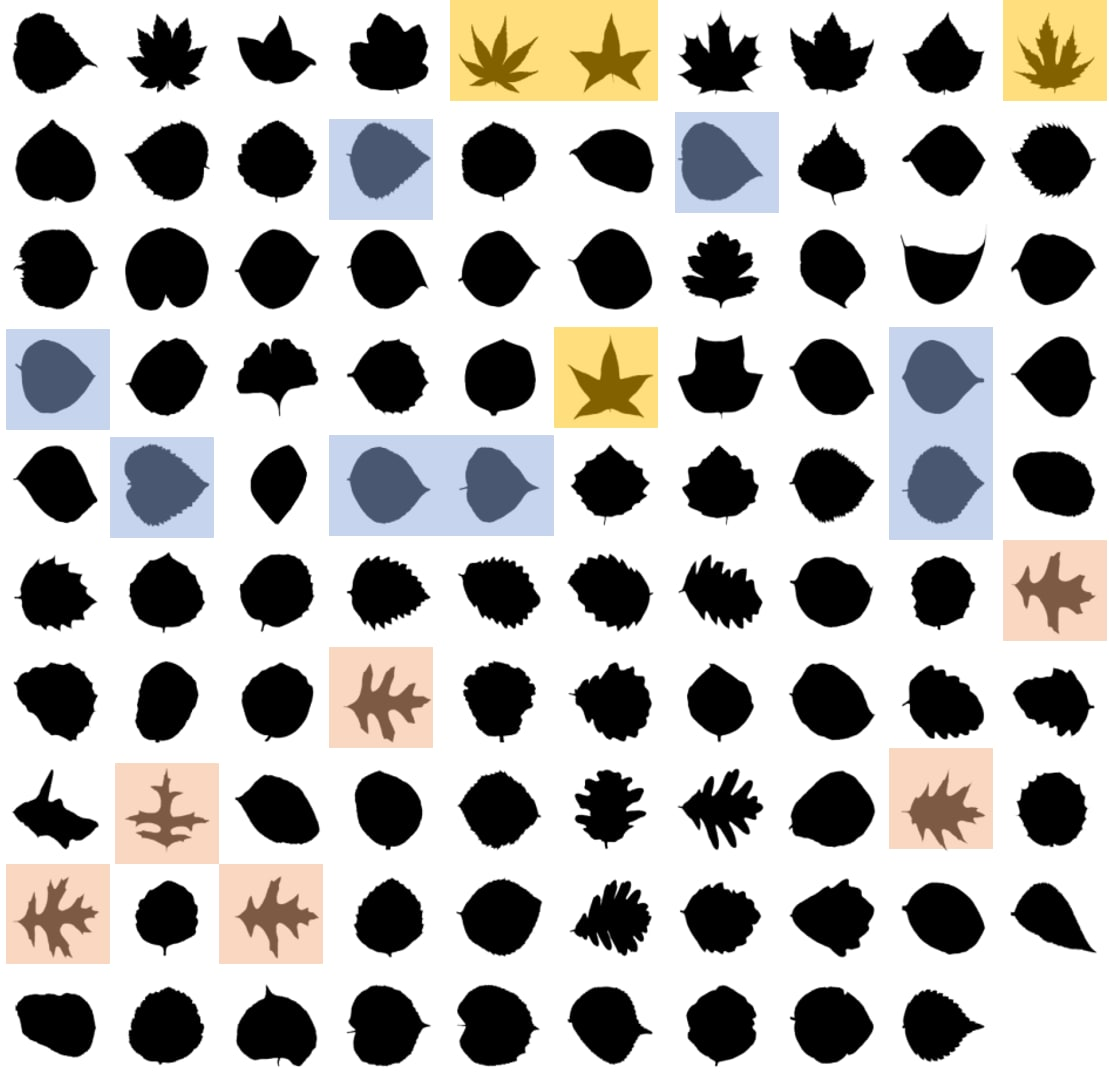

**Каковы минимальное/максимальное значения признаков? Каково множество значений признаков? Какие значения чаще всего принимают признаки? Похожи ли распределения разных признаков между собой?**

Максимальное и минимальное значение признаков - 1 и 0 соответственно. Это вполне очевидно для ч/б картинки и также подтверждается описательными статистиками по всем пикселям на всех картинках (см. ниже). Визуализация рандомных пикселей на всех картинках (делалась выше) в прицнипе соответствует общей картине - на каждой гистограмме много значений, приближенных либо к 1, либо к 0.

Множество значений признаков очень неоднородно и в основном концентрируется вокруг крайних значений, причем признаков со значением 0 в целом по датасету больше, чем признаков со значением 1 (довольно ожидаемо, т.к. собственно лист занимает не все пространство изображения). Такая общая неоднородность значений признаков может быть визуализирована общей гистограммой для множества значений пикселей на всех картинках (см. ниже). 

Визуализация разных пикселей на всех картинках (делалась выше) показывает уже неоднородность самих признаков, а не только их значений: например, есть такие пиксели, которые стабильно принимают одно и то же (или практически одно и то же) значение на всем множестве картинок, а есть те, в распределении которых имеются два пика в крайних значениях (распределены бимодально). В целом такая ивзуализация показывает, что есть константные признаки-пиксели (принимают только значение 0 и находятся, скорее всего, где-то на периферии изображения, либо значение 1 и находятся в самом центре изображения) и "двузначные" признаки-пиксели, которые для одних картинок характеризуют фон, для других - лист.

При этом можно точно утверждать, что признаки довольно редко принимают "пограничные" значения, то есть значения между 0 и 1, не приближенные к этим границам. Это говорит о том, что изображения довольно контрастные, и признаки, скорее всего, можно бинаризировать (об этом дальше).

In [40]:
pd.options.display.float_format = '{:.8f}'.format

for_stats = np.ravel(imgs_train)
pd.DataFrame(for_stats).describe()

,0
count,7920000.00000000
mean,0.46015969
std,0.48985295
min,0.00000000
25%,0.00000000
50%,0.00004118
75%,0.99607843
max,1.00000000


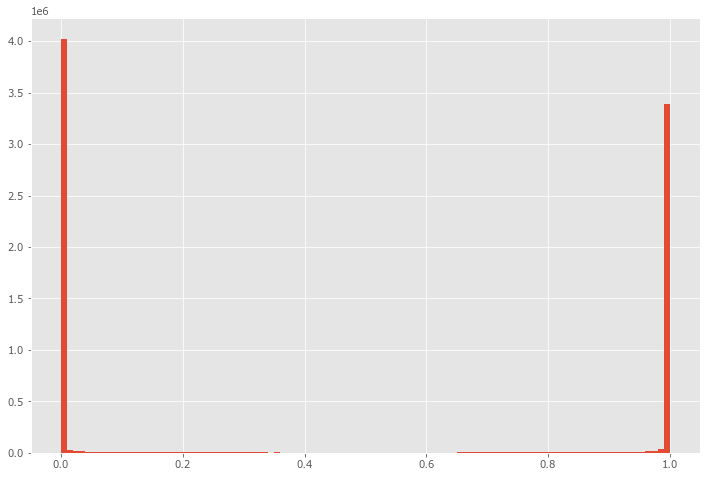

In [41]:
_ = plt.hist(for_stats, bins=100)

**Можно ли бинаризовать изображения (чтобы каждый пиксель принимал значение 0 или 1) без сильной потери информации? Почему вы так думаете? По какому порогу лучше бинаризовать?**

В целом все визуализации распределений признаков, а также распределение всех значений в целом говорит о том, что признаки **можно** бинаризировать, так как они и так содержат информацию о контрастных изображениях: признаки принимают значения 0 или 1 либо близкие к ним дробные значения. Поэтому, если основываться на визуализациях, можно сказать, что небольшим количеством дробных значений, не приближенных к 0 или 1, можно пренебречь. 

В целом характер распределения значений признаков позволяет выбрать порог 0.5 (просто среднее возможное значение признака), 0.46 (среднее значение признака на всех данных), либо 50-ю процентиль, которая делит распределение всех значений признаков на две равные части.

Тем не менее, для суждения о целесообразности интуитивной бинаризации лучше проверить ее на какой-нибудь модели. Я взяла логистическую регрессию, которую использовала дальше в задании на классификацию, поскольку она дала мне лучшее качество на данных небинаризированных картинок.

Сначала я смотрю распределение значений признаков по процентилям, чтобы понять, в какой части данных признаки принимают пороговые значения:

In [42]:
percentile = np.arange(50, 81)
for p in percentile:
    print(p, np.percentile(for_stats, p))

50 4.117647058820191e-05
51 0.014994751960788017
52 0.08142538823529372
53 0.2547573235294074
54 0.5297058823529387
55 0.7908874803921495
56 0.9387029960784314
57 0.9867843137254899
58 0.9921568627450981
59 0.9921568627450981
60 0.9960761960784312
61 0.996078431372549
62 0.996078431372549
63 0.996078431372549
64 0.996078431372549
65 0.996078431372549
66 0.996078431372549
67 0.996078431372549
68 0.996078431372549
69 0.996078431372549
70 0.996078431372549
71 0.996078431372549
72 0.996078431372549
73 0.996078431372549
74 0.996078431372549
75 0.996078431372549
76 0.9968039215686275
77 1.0
78 1.0
79 1.0
80 1.0


В целом видно, что в районе 53-57% данных признаки резко начинают принимать значения от маленьких (близких к нулю) к большим (близким к единице). Бинаризировать стоит где-то в этом диапазоне. Построю несколько моделей и проверю качество для разных варианов бинаризации:

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [46]:
percentile = np.arange(53, 61)
accuracy = []

for p in percentile:
    imgs_train_bin = np.zeros((792, 10000))
    imgs_test_bin = np.zeros((198, 10000))
    
    for i in range (imgs_train_bin.shape[0]):
        imgs_train_bin[i] = np.where(imgs_train[i] > np.percentile(for_stats, p), 1, 0)
    for j in range (imgs_test_bin.shape[0]):
        imgs_test_bin[j] = np.where(imgs_test[j] > np.percentile(for_stats, p), 1, 0)
        
    clf_lr = LogisticRegression(max_iter = 100)
    clf_lr.fit(imgs_train_bin, y_train)
    accuracy.append(accuracy_score(y_test, clf_lr.predict(imgs_test_bin)))
    

C:\Python\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Python\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_o

In [47]:
accuracy

[0.6111111111111112,
 0.6111111111111112,
 0.6060606060606061,
 0.6111111111111112,
 0.6262626262626263,
 0.6111111111111112,
 0.6111111111111112,
 0.5909090909090909]

Text(0.5, 1.0, 'Binarization selection by LogReg accuracy')

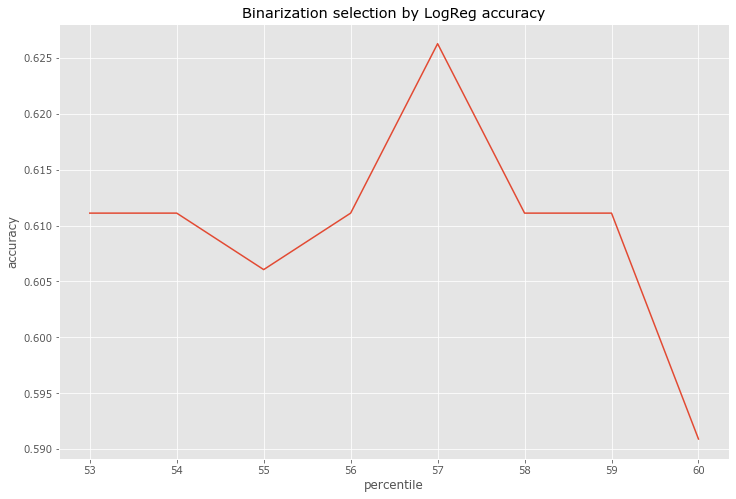

In [48]:
_ = plt.plot(percentile, accuracy)
plt.xlabel("percentile")
plt.ylabel('accuracy')
plt.title("Binarization selection by LogReg accuracy")

In [49]:
opt_perc = 57
np.percentile(for_stats, opt_perc)

0.9867843137254899

Проверка качества классификатора, основанного на логистической регрессии, показывает, что наилучшее качество модели достигается на 57 процентили - это значение признака, примерно равное 0.987. То есть в принципе можно пренебречь всеми пикселями, которые не являются самыми "четкими".

Проверю также интуитивно подобранные значения признака - 0.46 и 0.5:

In [50]:
for i in range (imgs_train_bin.shape[0]):
        imgs_train_bin[i] = np.where(imgs_train[i] > 0.46, 1, 0)
for j in range (imgs_test_bin.shape[0]):
        imgs_test_bin[j] = np.where(imgs_test[j] > 0.46, 1, 0)
clf_lr = LogisticRegression(max_iter = 100)
clf_lr.fit(imgs_train_bin, y_train)
clf_lr.predict(imgs_test_bin)
print(clf_lr.score(imgs_test_bin, y_test))
    
for i in range (imgs_train_bin.shape[0]):
        imgs_train_bin[i] = np.where(imgs_train[i] > 0.5, 1, 0)
for j in range (imgs_test_bin.shape[0]):
        imgs_test_bin[j] = np.where(imgs_test[j] > 0.5, 1, 0)
clf_lr = LogisticRegression(max_iter = 100)
clf_lr.fit(imgs_train_bin, y_train)
clf_lr.predict(imgs_test_bin)
print(clf_lr.score(imgs_test_bin, y_test))

C:\Python\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6262626262626263
0.6111111111111112


C:\Python\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Более высокое качество модели наблюдается при значении признака 0.46. Причем стоит заметить, что это качество равно качеству для признака равного 0.987 (предыдущий шаг), а также качеству, которое я дальше получаю при использовании не бинаризированных признаков. 

В целом можно сказать, что *бинаризация без потери качества возможна, но, скорее всего, не способствует большей точности при классификации.* Рискну предположить, что это связано именно с тем, что исходные изображения и так очень контрастные, то есть признаки с дробными значениями (не близкими к 0 и 1) никак не мешают модели классифицировать картинки. На эту мысль наталкивает именно то, что модель показывает одинаковое качество при порогах 0.987 и 0.46.

**Похож ли "средний лист" на обычный лист? Как вы думаете, почему? Много ли пикселей, которые всегда принимают одно и то же значение (константный признак)?**

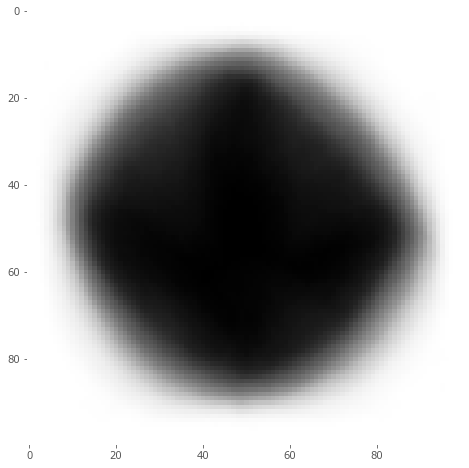




Средний лист ожидаемо не похож на обычный лист, поскольку является, грубо говоря, наложением всех листов друг на друга (технически он наложением при этом не является, так как все значения пикселей просто усреднены по листьям). По сути, такая визуализация показывает, как часто тот или иной пиксель занят изображением листьев разных классов. Поэтому в центре такого среднего листа значения признаков равны или близки к 1, поскольку изображение каждого листа так или иначе проходит через центр. Рассеивание пикселей на границах среднего листаотражает разницу в формах листьев разных классов.

Можно сделать и вывод о количестве константных признаков: судя по изображению листа, таких признаков относительно много (в центре изображения).

Более точно о константных признаках можно судить по распределению стандартных отклонений признаков: как видно, полностью константных признаков в датасете около 25%, остальные так или иначе варьируются почти до 0.5. 

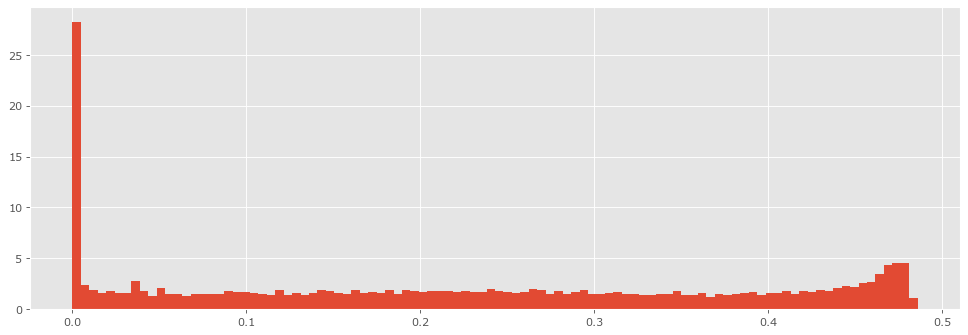

## 2. Exploration
Теперь попробуем разобраться с внутренней структурой наших данных: применим к ним кластеризацию. Ограничимся самым простым методом - KMeans.

### Понижение размерности (1 балл код + 1 балл выводы)
* Выполните кластеризацию листьев с помощью KMeans на 9 кластеров. Метрика по умолчанию.
* Как вы знаете, у каждого кластера в KMeans есть центр - вектор той же размерности, что и объекты. Визуализируйте центры кластеров (переменная cluster\_centers\_ - то же самое, что centers в семинаре) в виде изображений 100x100, оформите их табицей 3x3.
* Повторите предыдущие действия для 25 и 100 кластеров.

**Три кластера**

In [51]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=9, random_state=0).fit(imgs_train)

In [52]:
centers = kmeans.cluster_centers_

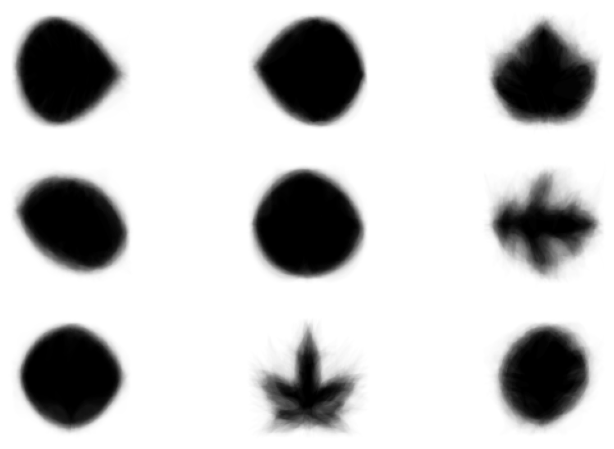

In [53]:
xs = np.linspace(-3, 3, 50)
for i in range(1, centers.shape[0]+1):
    plt.subplot(3, 3, i)
    plt.imshow(centers[i-1].reshape(100, 100), cmap='Greys')
    plt.grid(None)
    plt.axis("off") 

**25 кластеров**

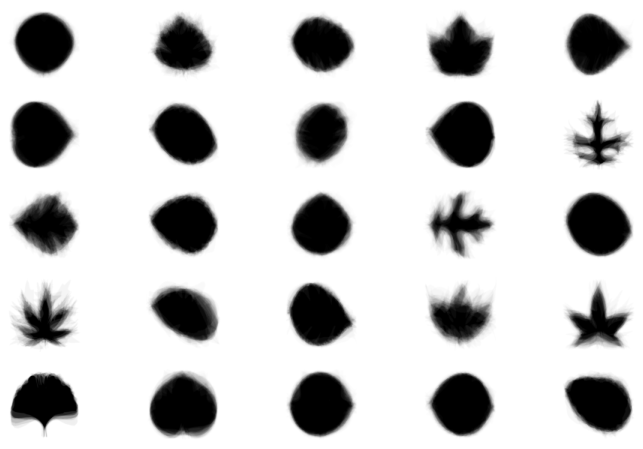

In [54]:
kmeans = KMeans(n_clusters=25, random_state=0).fit(imgs_train)
centers = kmeans.cluster_centers_

xs = np.linspace(-3, 3, 50)
for i in range(1, centers.shape[0]+1):
    plt.subplot(5, 5, i)
    plt.imshow(centers[i-1].reshape(100, 100), cmap='Greys')
    plt.grid(None)
    plt.axis("off") 

**100 кластеров**

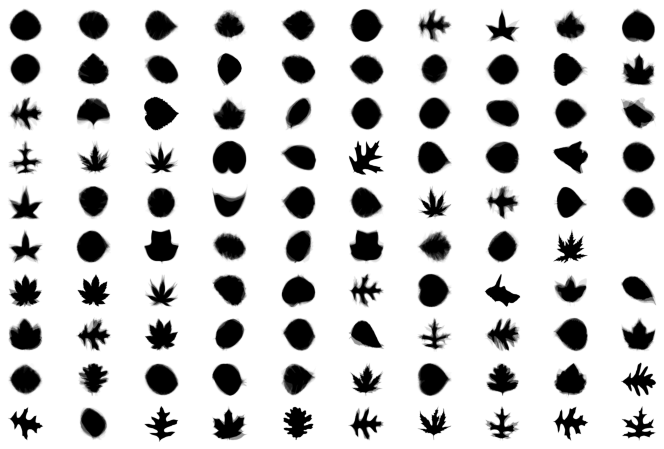

In [55]:
kmeans = KMeans(n_clusters=100, random_state=0).fit(imgs_train)
centers = kmeans.cluster_centers_

xs = np.linspace(-3, 3, 50)
for i in range(1, centers.shape[0]+1):
    plt.subplot(10, 10, i)
    plt.imshow(centers[i-1].reshape(100, 100), cmap='Greys')
    plt.grid(None)
    plt.axis("off") 

Ответьте на вопросы:
* Похожи ли центры кластеров на листья?
* В чем отличие от картинок листьев? В чем причина этого отличия?
* Есть ли среди кластеров похожие (или повторяющиеся)? 
* Какое, по вашему мнению, количество кластеров лучше всего подходит под эти данные? Почему?

**Ответы**

Центры кластеров ожидаемо похожи на изображения самих листьев, поскольку они в целом по определению характеризуют все объекты в кластере.

Отличие от картинок листьев - границы изображений цетров кластеров более размытые. Это можно объяснить тем, что листья, попавшие в соответстующие кластеры, не идентичны друг другу (и не должны быть даже в переделах своего класса), а центры кластеров как раз харакетризуют все попавшие в них объекты вместе. Больше всего это проявляется для случая с маленьким количеством класеров - изображения центров очень размыты, поскольку маленькое кол-во кластеров включили в себя очень разные объекты, имеющие меньшую схожесть, чем объекты в кластерах для следующих разбиений.

Похожие кластеры есть на всех разбиениях. Это в основном касается классов "круглых" листьев, сходство которых я отметила ранее. Так как многие классы отличаются друг от друга незначительными визуальными деталями, то и попадание в кластеры, обусловленное лишь такими деталями, делает итоговые кластеры визуально похожими. При 100 кластерах можно увидеть повторяющиеся - это видно по количеству листьев сложной формы, которых в изначальной визуализации было немного меньше.

Лучше всего под данные, как мне кажется, подходит разбиение на 25 кластеров. Если при 9 кластерах хорошо объединились "круглые" листья (центры все разные), то кластеры со сложными листьями, кажется, не учитывают специфику многих попавших в них объектов (об этом свидетельствует размытость изображений центров для кластеров с листьями сложной формы). При 100 кластерах уже начинаются повторения. Поэтому оптимальны 25 кластеров, где учтена форма и круглых, и более сложных типов листьев (при этом даже в случае с листьями простой формы я не вижу повторяющихся кластеров).

## 3. Prediction
Перейдем к решению задачи предсказания.

### 3 классификатора (1 балл код + 1 балл выводы)
Настройте 3 классификатора на изображениях и выполните их визуализацию.
* Начнем с примитивного метрического классификатора - [центроидного](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestCentroid.html). Он использует идеи k-Means для решения задачи классификации: для каждого класса находит его центр (усреднением) - это обучение, а затем на этапе предсказания относит объект к тому классу, к центру которого он ближе. Настройте классификатор с гиперпараметрами по умолчанию на обучающей выборке. Выведите качество предсказания (accuracy) на контрольной выборке.
* Теперь по аналогии с KMeans визуализируйте центры классов - нарисуйте 99 изображений.
* Второй классификатор - наивный байесовский. Мы не рассматривали его в курсе, но про него можно почитать в [документации sklearn](http://scikit-learn.org/stable/modules/naive_bayes.html). Мы знаем, что наши признаки принимаю целочисленные значения, поэтому для описания признаков подойдет мультиномиальное распределение. Настройте MultinomialNB для наших данных, выведите качество на контрольных данных.
* У MultinomialNB после обучения появляется атрибут feature\_log\_prob_ - это оцененный по данным логарифм вероятности каждого признака для каждого класса $P(x_i|y)$ (выведите форму атриюута, чтобы лучше понять, что имеется в виду). Визуализируйте эту матрицу в виде изображений 100x100 по аналогии с предыдущим классификатором.
* Третий классификатор - линейный. Настройте LogisticRegression и выведите качество на контрольной выборке.
* Отобразите веса для каждого класса в виде картинки 100x100.

In [56]:
from sklearn.neighbors import NearestCentroid
from sklearn.metrics import accuracy_score

In [57]:
imgs_test.shape
y_test.shape

(198,)

In [58]:
clf_nc = NearestCentroid()
clf_nc.fit(imgs_train, y_train)
clf_nc_preds = clf_nc.predict(imgs_test)

In [59]:
print('Accuracy score for NearestCentroid classifier:', accuracy_score(y_test, clf_nc_preds))

Accuracy score for NearestCentroid classifier: 0.5555555555555556


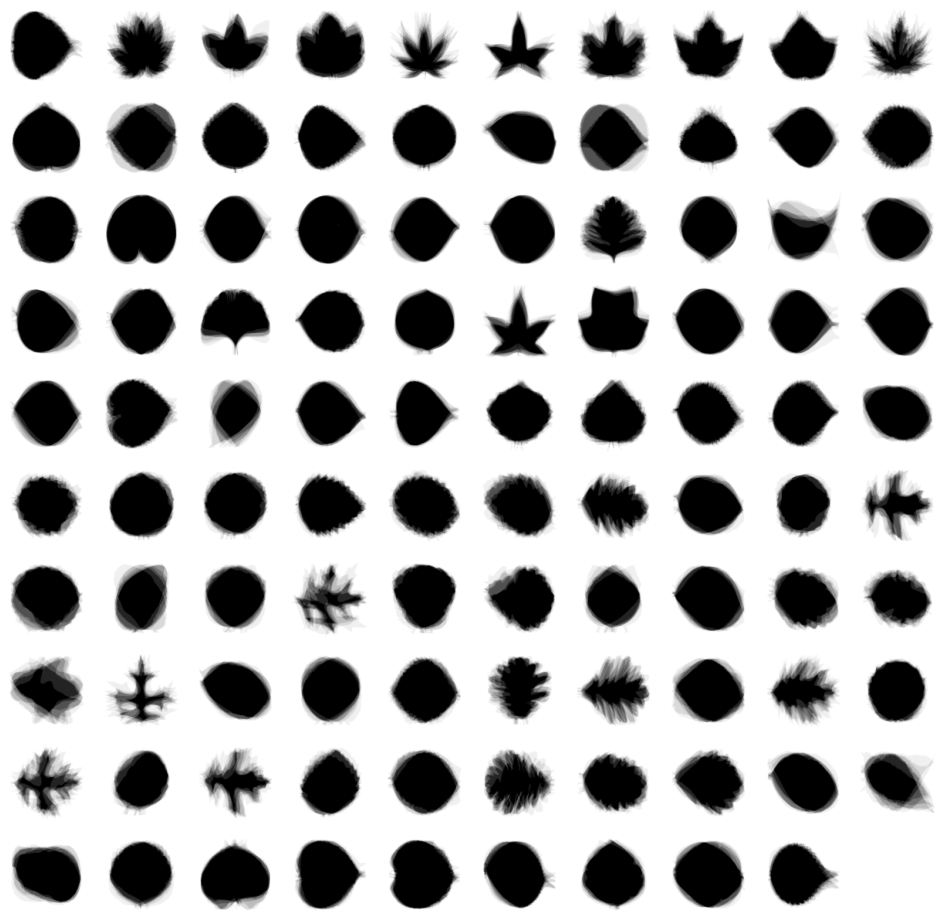

In [60]:
centers = clf_nc.centroids_

figure(figsize=(15, 15), dpi=80)
xs = np.linspace(-3, 3, 1000)
for i in range(1, centers.shape[0]+1):
    plt.subplot(10, 10, i)
    plt.imshow(centers[i-1].reshape(100, 100), cmap='Greys')  
    plt.grid(None)
    plt.axis("off") 

In [61]:
from sklearn.naive_bayes import MultinomialNB

In [62]:
clf_nb = MultinomialNB()
clf_nb.fit(imgs_train, y_train)
clf_nb_preds = clf_nb.predict(imgs_test)

In [63]:
print('Accuracy score for MultinominalNB classifier:', accuracy_score(y_test, clf_nb_preds))

Accuracy score for MultinominalNB classifier: 0.51010101010101


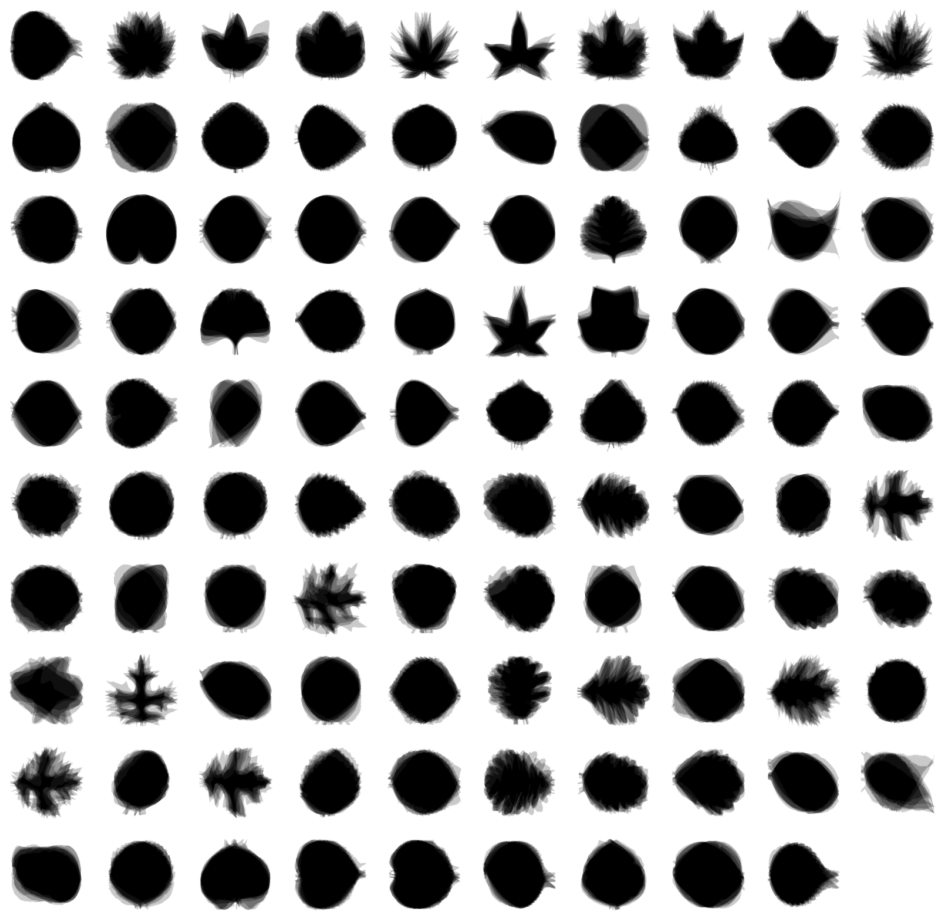

In [64]:
probs = clf_nb.feature_log_prob_

figure(figsize=(15, 15), dpi=80)
xs = np.linspace(-3, 3, 1000)
for i in range(1, probs.shape[0]+1):
    plt.subplot(10, 10, i)
    plt.imshow(probs[i-1].reshape(100, 100), cmap='Greys')  
    plt.grid(None)
    plt.axis("off") 

In [65]:
from sklearn.linear_model import LogisticRegression

In [66]:
clf_lr = LogisticRegression(max_iter = 100)
clf_lr.fit(imgs_train, y_train)
clf_lr_preds = clf_lr.predict(imgs_test)

C:\Python\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [67]:
print('Accuracy score for LogisticRegression classifier:', accuracy_score(y_test, clf_lr_preds))

Accuracy score for LogisticRegression classifier: 0.6262626262626263


In [68]:
clf_lr.coef_.shape

(99, 10000)

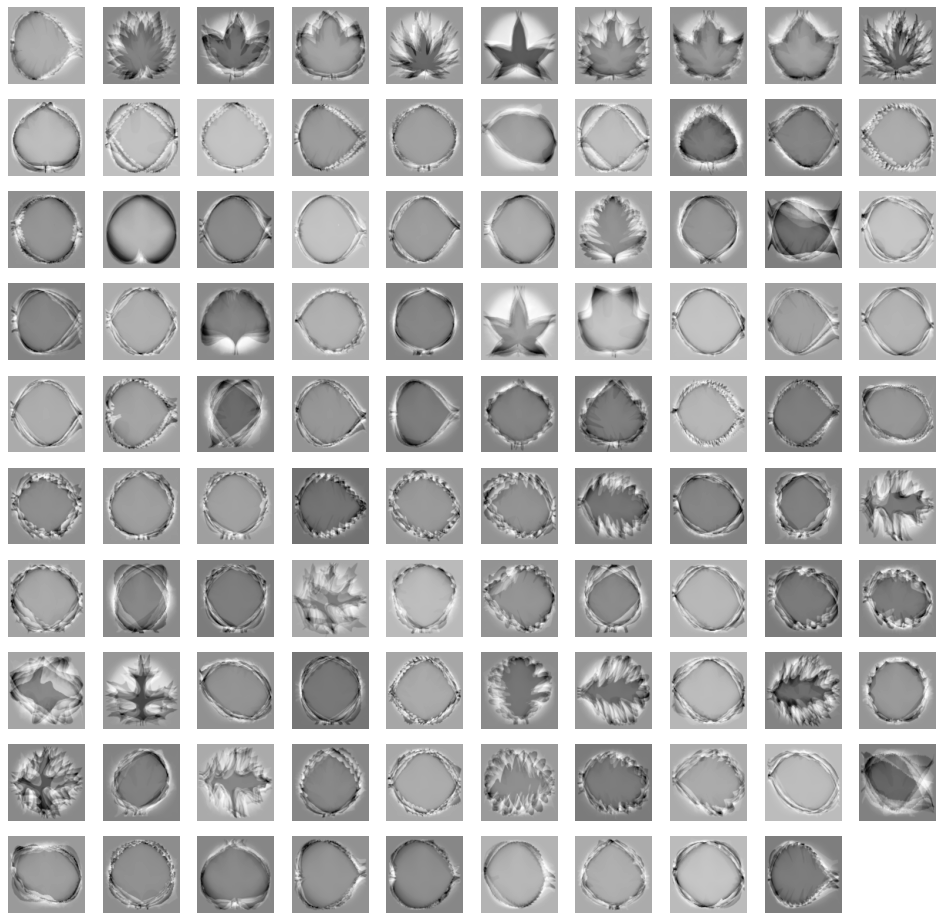

In [69]:
coefs = clf_lr.coef_

figure(figsize=(15, 15), dpi=80)
xs = np.linspace(-3, 3, 1000)
for i in range(1, coefs.shape[0]+1):
    plt.subplot(10, 10, i)
    plt.imshow(coefs[i-1].reshape(100, 100), cmap='Greys')  
    plt.grid(None)
    plt.axis("off") 

Ответьте на вопросы:
* Какой классификатор работает лучше? Предположите, почему.
* Похожи ли центры кластеров на исходные изображения листьев? А визуализированные вероятности? А веса?
* Как вы думаете, почему картинки весов линейного классификатора отличаются от остальных визуализаций?

In [70]:
print('Accuracy score for NearestCentroid classifier:', accuracy_score(y_test, clf_nc_preds))
print('Accuracy score for MultinominalNB classifier:', accuracy_score(y_test, clf_nb_preds))
print('Accuracy score for LogisticRegression classifier:', accuracy_score(y_test, clf_lr_preds))

Accuracy score for NearestCentroid classifier: 0.5555555555555556
Accuracy score for MultinominalNB classifier: 0.51010101010101
Accuracy score for LogisticRegression classifier: 0.6262626262626263


**Ответы**

Лучше всего работает классификатор, основанный на логистической регрессии - он показал лучшее качество на тестовой выборке. Возможно, это связано с тем, что распределение значений признаков довольно неплохо подходит идее модели логистической регрессии. Большое количество значений, близких к 1 и 0, но не равных им, соответствует логистической кривой (сигмоиде), которая в ней используется.

Центры кластеров и визуализированные вероятности первых двух моделей похожи на исходные изображения листьев, отличаясь от них большей размытостью в силу как различий листьев, так и несовершенств самих моделей. Веса линейного классификатора тоже похожи на листья, но отличаются другой тональностью.

Возможно, суть отличия состоит в том, что визуализированы именно веса признаков - таким образом, признаки, отвечающие за пространство внутри листа и фон, оказываются менее значимыми для предсказания класса листа, а признаки, отвечающие за границы листов, уже имеют большее значение для определение класса.

### Случайный лес (0.25 балла код + 0.25 балла выводы)
* Настройте случайный лес на изображениях. Выведите качество на контроле.
* Отобразите feature\_importances\_ в виде картинки 100x100.

In [71]:
from sklearn.ensemble import RandomForestRegressor

In [72]:
rf_model = RandomForestRegressor()
rf_model.fit(imgs_train, y_train)
rf_preds = rf_model.predict(imgs_test)

In [73]:
from sklearn.metrics import r2_score
rf_score_all_test = r2_score(y_test, rf_preds)
rf_score_all_test

0.4766224267161411

In [74]:
rf_imps = rf_model.feature_importances_

In [75]:
rf_imps.shape

(10000,)

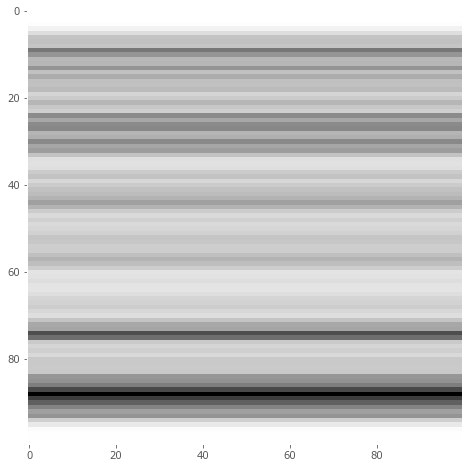

In [76]:
rf_imps_resized = resize(rf_imps, (100, 100))
plt.imshow(rf_imps_resized, cmap='Greys')
plt.grid(None)

Ответьте на вопросы:
* похожа ли картинка на изображение листа?
* соответствует ли картинка здравому смыслу? Можно ли сказать, что участки картинки, которые RF определил как неважные, действительно не помогают определить класс листа? Ответить на вопрос поможет сопоставление с изображением разброса каждого признака по выборке (см. раздел Простая визуализация, последний пункт).

**Ответы**

Картинка совсем не похожа на изображение листа.

В целом, думаю, можно сказать, что RF довольно разумно определил значимые признаки, если я правильно понимаю его логику. Более значмимыми являются признаки, близкие к нулю, это может означать, что это признаки на границах изображенного листа, которые отображают его форму. Константные же признаки ожидаемо дают мало информации о принадлежности листа к классу.

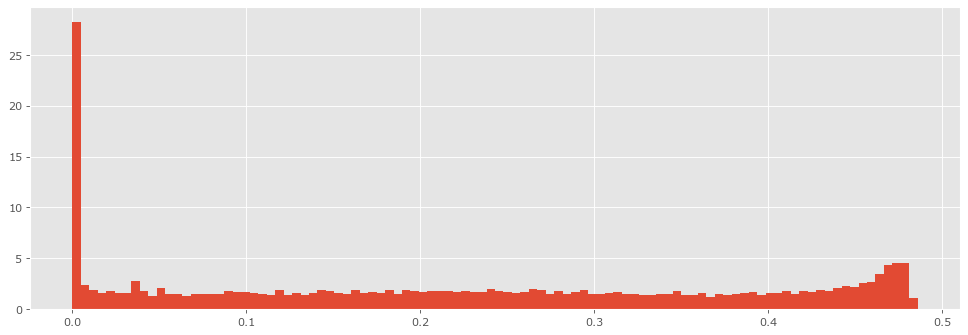

## 4. Feature engeneering and selection

Попробовали методы - надо попробовать новые признаки.

### Понижение размерности + RF (0.5 балла код + 0.5 балла выводы)
Сейчас наши данные имеют высокую размерность признакового описания - 10000. А надо ли столько много? Не окажется ли, что реально вся информация может быть записана в гораздо меньшее количество признаков?
* Для всех значений числа компонент в num_components обучите PCA с такой размерностью и на этих признаках обучите случайный лес. Запишите в отдельные массивы качество на обучении и качество на контроле. 
* Для RF на исходных признаках выведите качество и на контроле, и на обучении.
* На одной картинке постройте три графика: по оси x - число компонент, по оси ординат - качество; первый график - качество на обучении, второй - качество на контроле, третий - горизонтальная прямая (качество на контроле на исходных признаках).

_Примечание._ Чтобы построить 3 графика на одной картинке, просто используйте plt.plot(xs, ys) три раза подряд без plt.show(). После этого вставьте строку plt.xscale("log"), чтобы масштаб по оси абсцисс был логарифмическим.

In [77]:
num_c = 2**np.arange(10)
num_c

array([  1,   2,   4,   8,  16,  32,  64, 128, 256, 512], dtype=int32)

In [78]:
from sklearn.decomposition import PCA

In [79]:
test_ac = []
train_ac = []

for n in num_c:
    pca = PCA(n_components = n)
    x_train_new = pca.fit(imgs_train).transform(imgs_train)
    x_test_new = pca.transform(imgs_test)
    rf_model = RandomForestRegressor()
    rf_model.fit(x_train_new, y_train)
    test_ac.append(r2_score(y_test, rf_model.predict(x_test_new)))
    train_ac.append(r2_score(y_train, rf_model.predict(x_train_new)))

In [80]:
scores = []
for i in range(num_c.shape[0]):
    scores.append(rf_score_all_test)

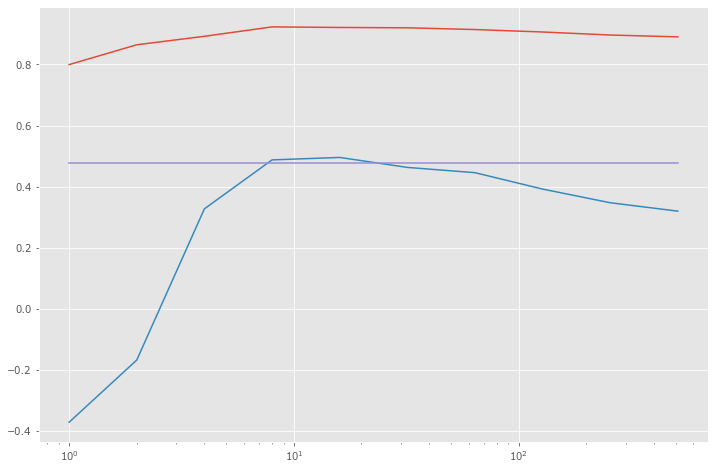

In [81]:
plt.plot(num_c, train_ac) 
plt.plot(num_c, test_ac)
plt.plot(num_c, scores)
plt.xscale("log")

In [82]:
rf_model = RandomForestRegressor()
rf_model.fit(imgs_train, y_train)
rf_preds_test = rf_model.predict(imgs_test)
rf_preds_train = rf_model.predict(imgs_train)

In [83]:
r2_score(y_train, rf_preds_train)

0.9130056023500309

In [84]:
r2_score(y_test, rf_preds_test)

0.4802425751391465

In [85]:
test_ac

[-0.3715925188620903,
 -0.16789661410018564,
 0.3271503549783549,
 0.4874161805813234,
 0.49545036239950524,
 0.46282675200989487,
 0.4455413252937538,
 0.3918622207792207,
 0.34709722634508344,
 0.31962023129251704]

Ответьте на вопросы:
* Можно ли сказать, что случайный лес переобучается?
* Можно ли указать число компонент, при котором достигается максимальное качество на контроле? Сильно ли это значение отличается от качество на всех признаках?

**Ответы**

Высокое качество модели на обучающей выборке и низкое (примерно в два раза ниже) на тестовой является признаком переобучения. Поэтому да, можно утверждать, что RF переобучается.

Максимальное качество на контроле достигается при 16 компонентах. При этом это значение не сильно отличается от качества на всех признаках.

### Обучение модели на табличных данных (0.25 балла код + 0.25 балла выводы)

В этом пункте мы возьмем табличные данные - те, которые открывали в самом начале. Это некие характеристики листьев, извлеченные из картинок. Будем считать это хорошим feature engineering'ом - как будто мы взяли и нагенерировли хороших признаков. Теперь настроим под них классификатор.

Обучите RandomForest на табличных данных, выведите качество на контроле, сравните его с качеством модели, обученной на исходных изображениях листьев. Сильно ли изменилось качество? Как вы думаете, почему?

In [86]:
rf_table = RandomForestRegressor()
rf_table.fit(X_train, y_train)
rf_table_preds = rf_table.predict(X_test)
r2_score(y_test, rf_table_preds)

0.7191827217068645

Качество на тестовой выборке табличных данных гораздо выше качества на данных по пикселям изображений. Я думаю, это связано с характером признаков в табличном датасете, которые, возможно, более полно описывают объекты (например, есть отдельные классы признаков для формы листа и для его границ; не уверена, что значат признаки texture, но возможно, табличные данные отражают еще и другие опознавательные признаки листьев, которые не считываются прямо с картинки). Кроме того, думаю, хорошему качеству на пиксельных данных могло сильно помешать сжатие и перобразование в квадратный формат, в то время как таблица описывает листья в их исходном виде (если я правильно понимаю структуру признаков в ней).

### Бонусное задание (2 балла): Настройка гиперпараметров случайного леса
С помощью `GridSearchCV` или `RandomizedSearchCV` подберите параметры для случайного леса для модели на табличных данных.

* Используйте `StratifiedKFold` на 4х фолдах (используйте только обучающую выборку). Мера качества - `accuracy`
* Примените оптимальную модель на контрольной выборке
* Для нескольких любых случаев, где была допущена ошибка, выведите истинное изображение листа и одно из изображений листа предсказанного класса.